In [ ]:
!pip install pandas plotly matplotlib seaborn folium xmltodict missingno streamlit



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [ ]:
# main.ipynb — Cell 2: Imports & Dataset Upload (Colab)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

from google.colab import files
print("Please upload weather_2013_to_2024.csv:")
uploaded = files.upload()




Please upload weather_2013_to_2024.csv:


Saving weather_2013_to_2024.csv to weather_2013_to_2024.csv


In [ ]:
df = pd.read_csv("weather_2013_to_2024.csv")
print(f"Shape: {df.shape}")
print(f"Rows: {len(df)}, Columns: {len(df.columns)}")
df.head()


Shape: (3557, 29)
Rows: 3557, Columns: 29


,Unnamed: 0,DATE,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,precip,...,year-2000,weekofyear,tempmax_humidity,tempmin_humidity,temp_humidity,feelslikemax_humidity,feelslikemin_humidity,feelslike_humidity,temp_range,heat_index
0,0,4/14/2013,37.7,23.1,28.7,35.4,23.1,28.1,39.7,2.0,...,13,15,1496.69,917.07,1139.39,1405.38,917.07,1115.57,14.6,147.178118
1,1,4/15/2013,37.5,21.1,28.6,35.3,21.1,28.0,41.7,0.0,...,13,16,1563.75,879.87,1192.62,1472.01,879.87,1167.60,16.4,151.731061
2,2,4/16/2013,40.1,21.9,31.7,37.5,21.9,30.4,30.7,0.0,...,13,16,1231.07,672.33,973.19,1151.25,672.33,933.28,18.2,118.211133
3,3,4/17/2013,36.4,21.0,29.9,34.0,21.0,28.5,27.4,0.0,...,13,16,997.36,575.40,819.26,931.60,575.40,780.90,15.4,113.320354
4,4,4/18/2013,37.5,21.7,30.6,35.2,21.7,29.2,23.7,0.0,...,13,16,888.75,514.29,725.22,834.24,514.29,692.04,15.8,101.407038


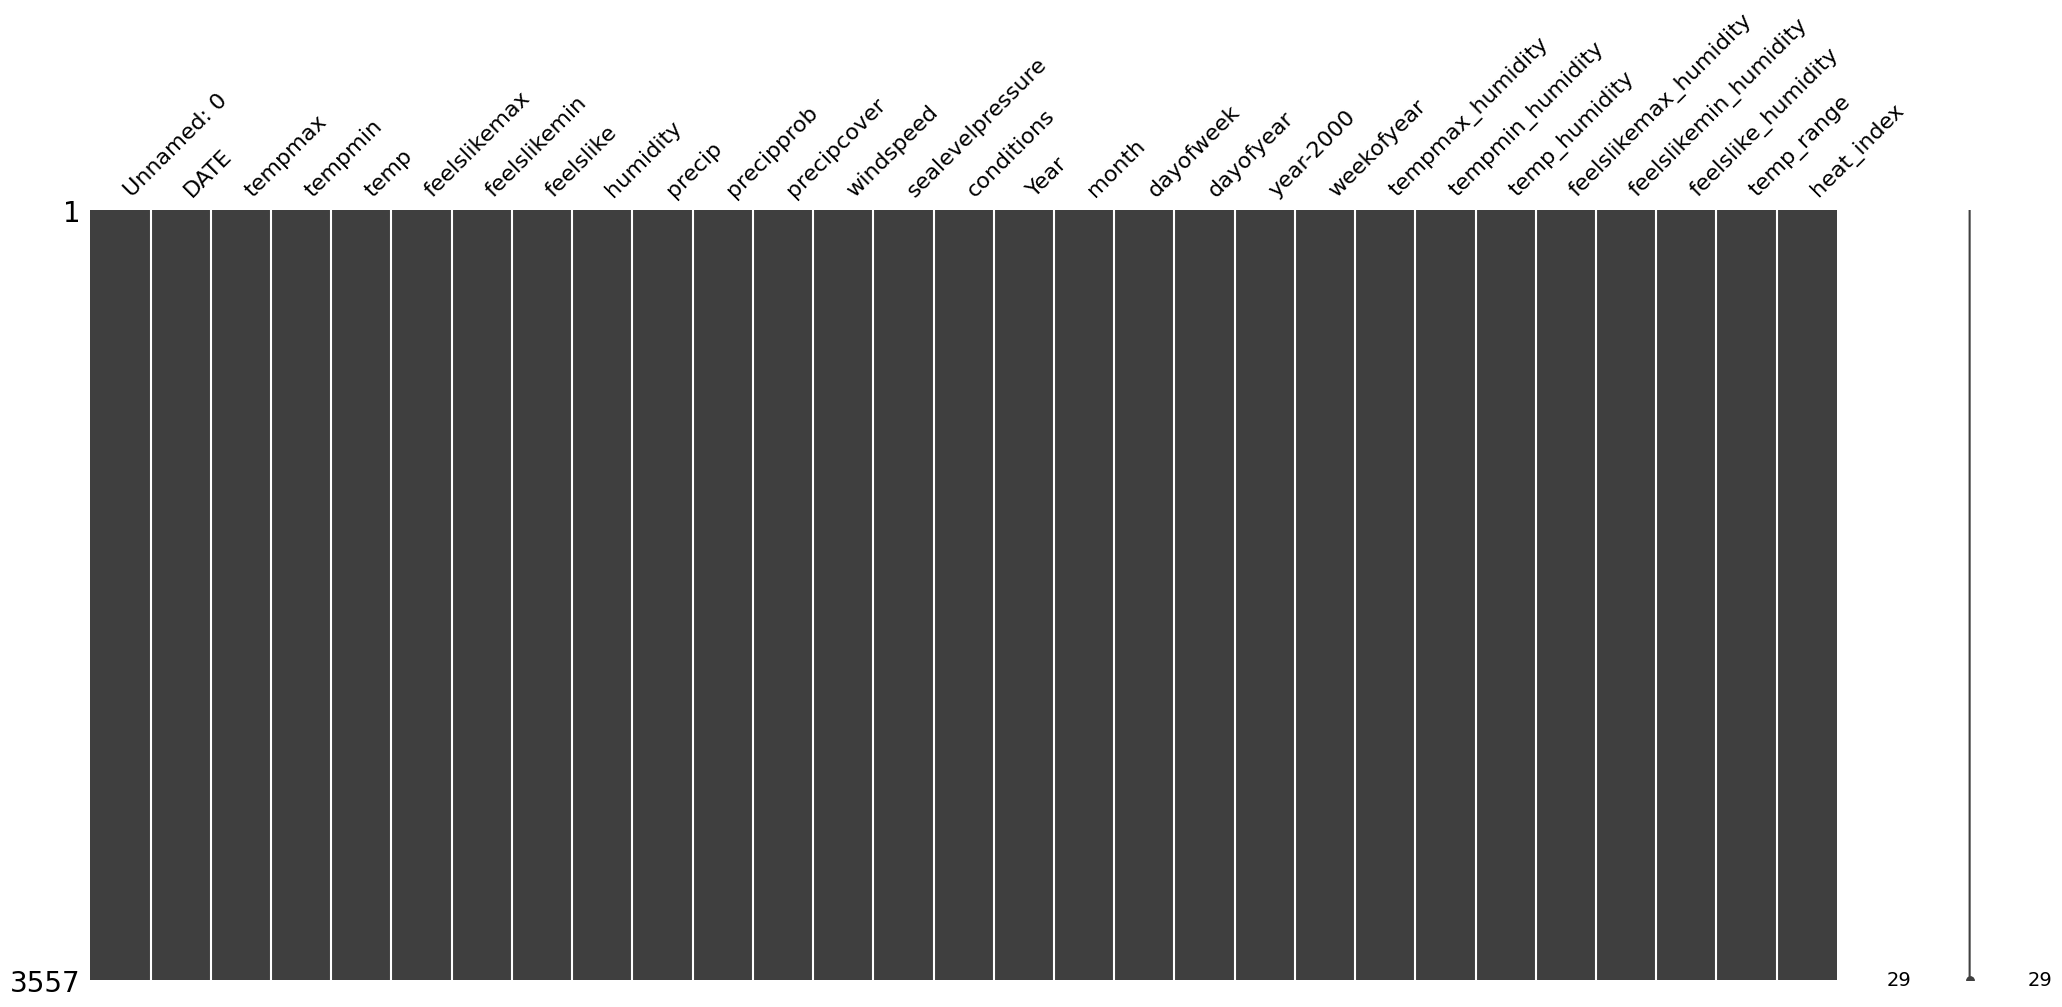

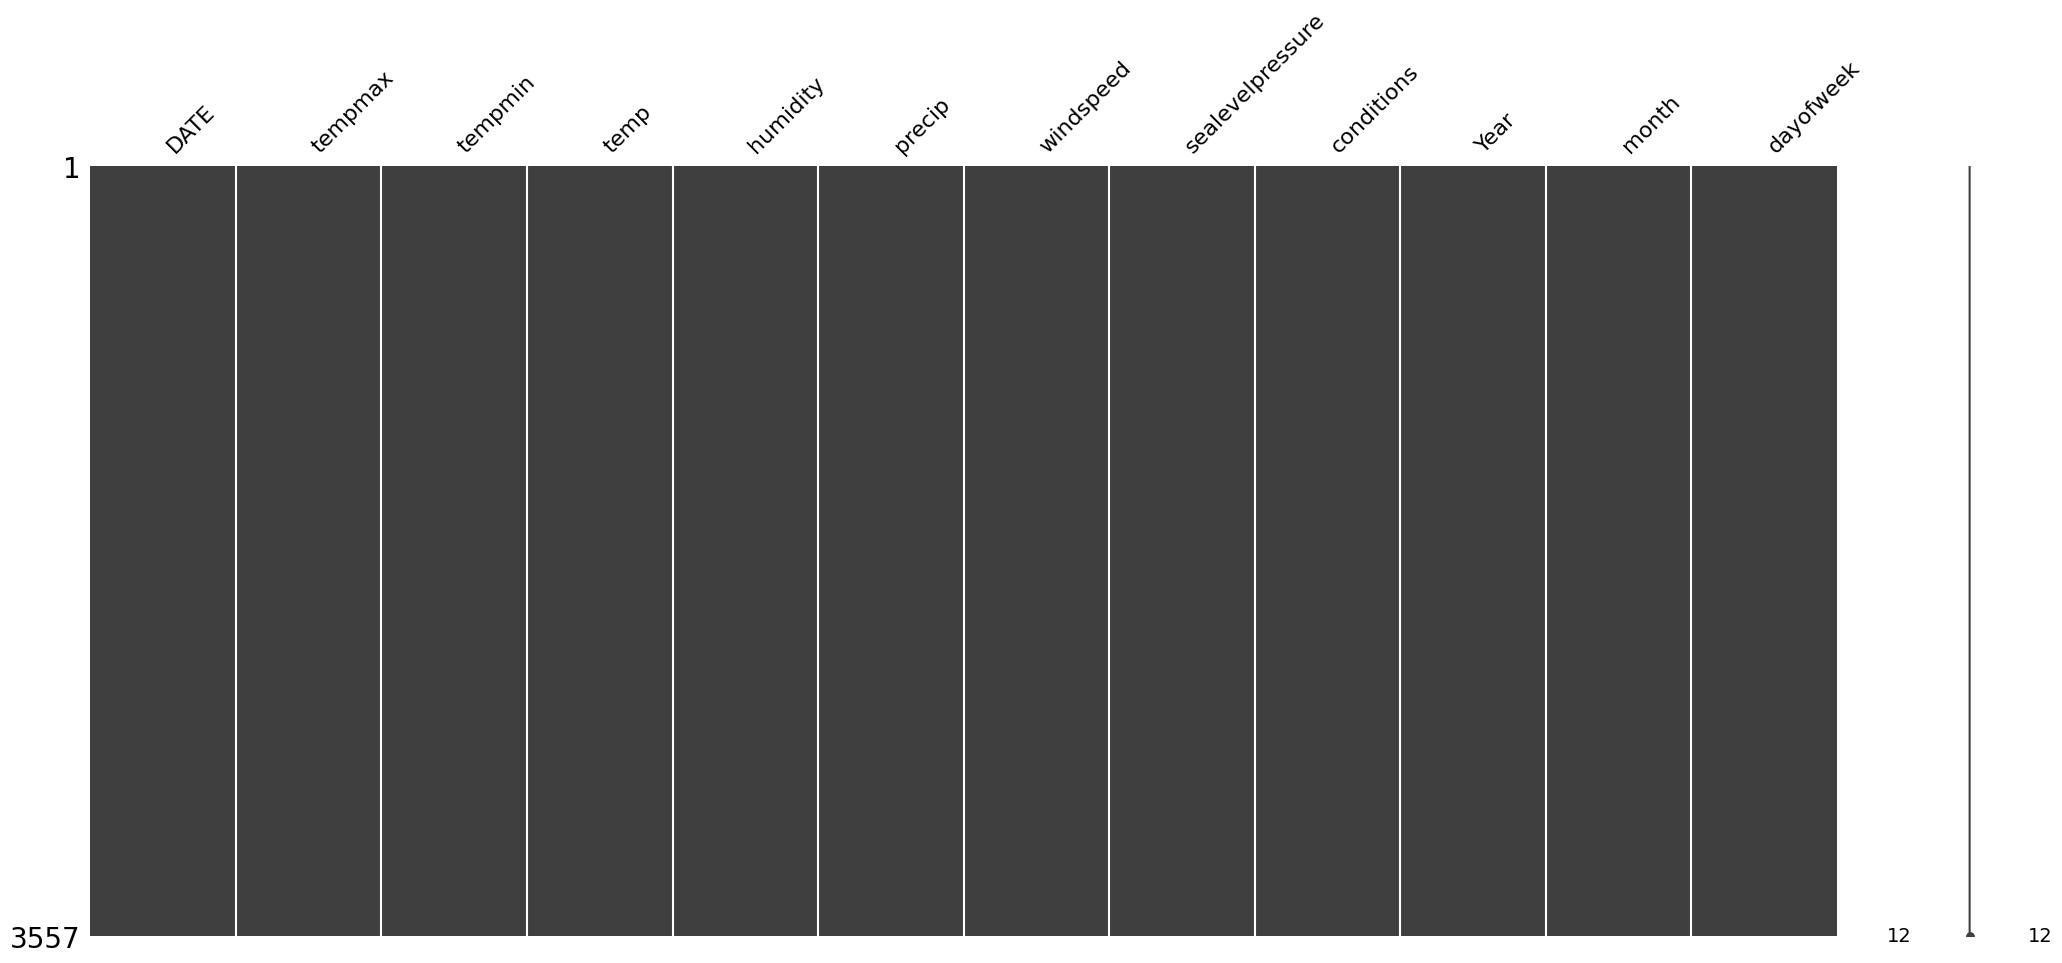

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3557 entries, 0 to 3556
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              3557 non-null   datetime64[ns]
 1   tempmax           3557 non-null   float64       
 2   tempmin           3557 non-null   float64       
 3   temp              3557 non-null   float64       
 4   humidity          3557 non-null   float64       
 5   precip            3557 non-null   float64       
 6   windspeed         3557 non-null   float64       
 7   sealevelpressure  3557 non-null   float64       
 8   conditions        3557 non-null   object        
 9   Year              3557 non-null   int64         
 10  month             3557 non-null   int64         
 11  dayofweek         3557 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(3), object(1)
memory usage: 333.6+ KB
None


In [ ]:
# main.ipynb — Cell 3: Data Cleaning & Pipeline
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
# Visualize missing data
msno.matrix(df)
plt.show()

# Retain relevant columns for trend analysis
cols_needed = ['DATE', 'tempmax', 'tempmin', 'temp', 'humidity', 'precip',
               'windspeed', 'sealevelpressure', 'conditions', 'Year', 'month', 'dayofweek']
df = df[cols_needed]

# Visualize missing data
msno.matrix(df)
plt.show()

# Drop rows missing key temps
df = df.dropna(subset=['temp', 'tempmax', 'tempmin'])
# Fill humidity/precip/windspeed with median
for col in ['humidity', 'precip', 'windspeed']:
    df[col] = df[col].fillna(df[col].median())
print(df.info())


In [ ]:
# main.ipynb — Cell 4: Feature Engineering (Optional)
df['temp_range'] = df['tempmax'] - df['tempmin']


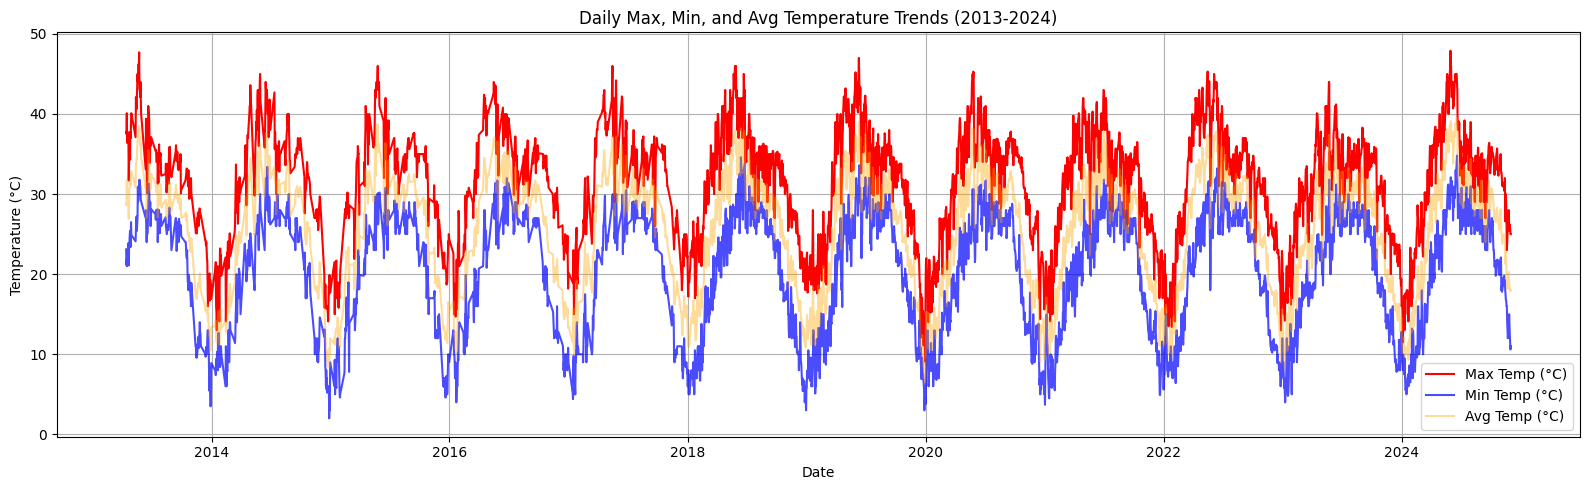

In [ ]:
# main.ipynb — Cell 5: Daily Temperature Trends (Line chart)
plt.figure(figsize=(16,5))
plt.plot(df['DATE'], df['tempmax'], label="Max Temp (°C)", color='red')
plt.plot(df['DATE'], df['tempmin'], label="Min Temp (°C)", color='blue', alpha=0.7)
plt.plot(df['DATE'], df['temp'],   label="Avg Temp (°C)", color='orange', alpha=0.4)
plt.title("Daily Max, Min, and Avg Temperature Trends (2013-2024)")
plt.xlabel("Date"); plt.ylabel("Temperature (°C)")
plt.legend(); plt.grid(True)
plt.tight_layout()
plt.show()


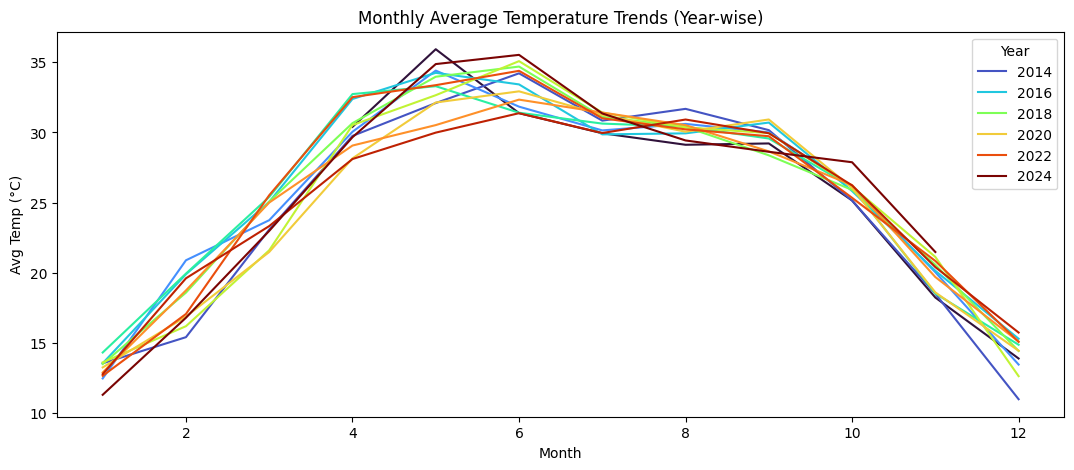

In [ ]:
# main.ipynb — Cell 6: Monthly Average Temperature, Year by Year
monthly_avg = df.groupby(['Year','month'])['temp'].mean().reset_index()
plt.figure(figsize=(13,5))
sns.lineplot(data=monthly_avg, x='month', y='temp', hue='Year', palette='turbo')
plt.title("Monthly Average Temperature Trends (Year-wise)")
plt.xlabel("Month"); plt.ylabel("Avg Temp (°C)")
plt.show()


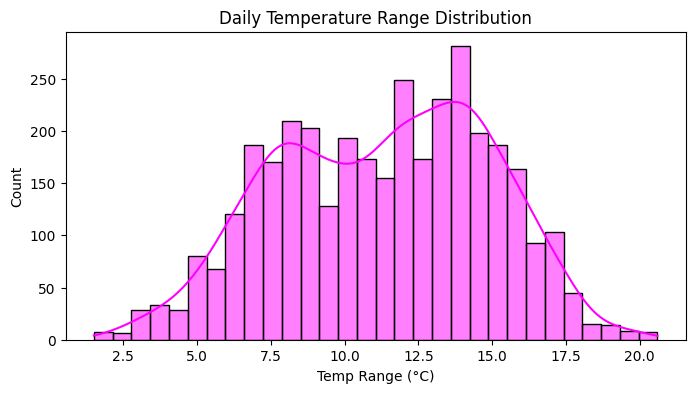

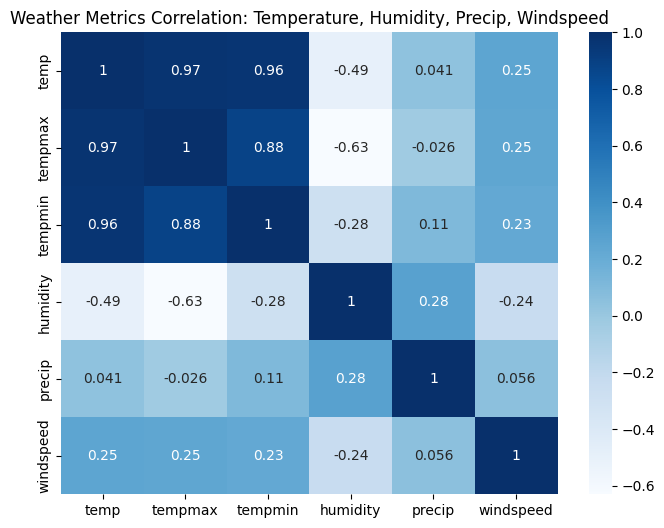

In [ ]:
# main.ipynb — Cell 7: Distribution & Correlation
# Temperature range histogram
plt.figure(figsize=(8,4))
sns.histplot(df['temp_range'], bins=30, kde=True, color='magenta')
plt.title("Daily Temperature Range Distribution")
plt.xlabel("Temp Range (°C)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['temp','tempmax','tempmin','humidity','precip','windspeed']].corr(),
            annot=True, cmap='Blues')
plt.title("Weather Metrics Correlation: Temperature, Humidity, Precip, Windspeed")
plt.show()


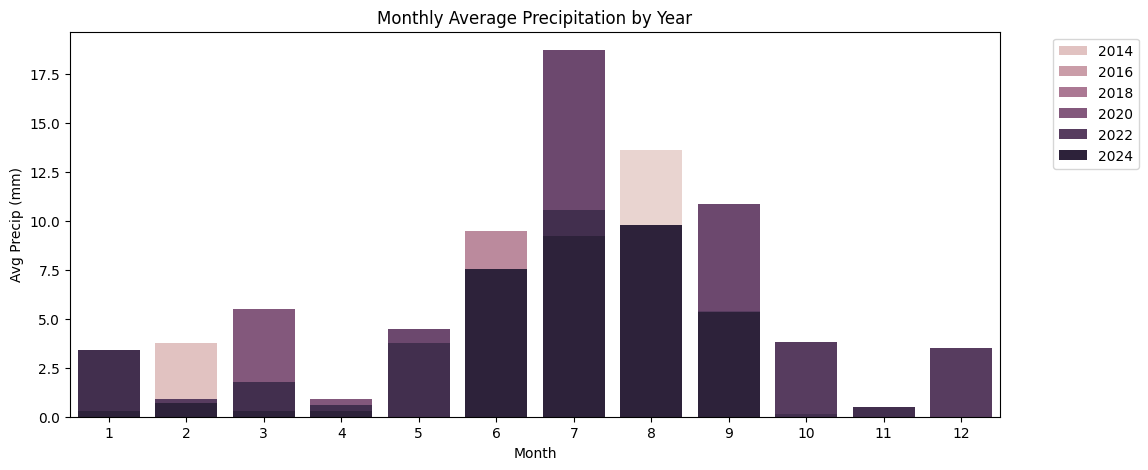

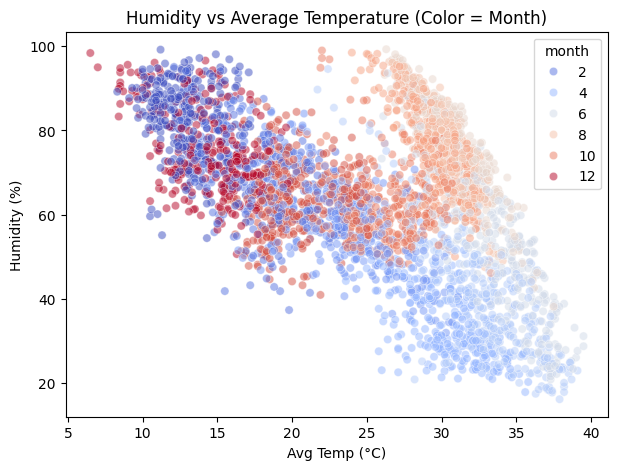

In [ ]:
# main.ipynb — Cell 8: Monthly Average Precipitation
monthly_prcp = df.groupby(['Year', 'month'])['precip'].mean().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data=monthly_prcp, x='month', y='precip', hue='Year', dodge=False)
plt.title("Monthly Average Precipitation by Year")
plt.xlabel("Month"); plt.ylabel("Avg Precip (mm)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Humidity/Temperature Pairwise
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='temp', y='humidity', hue='month', palette='coolwarm', alpha=0.5)
plt.title("Humidity vs Average Temperature (Color = Month)")
plt.xlabel("Avg Temp (°C)"); plt.ylabel("Humidity (%)")
plt.show()


In [ ]:
!pip install -U scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 84.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
# main.ipynb —  Cell 9: Apply Regression Model (Optional block)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

features = ['month', 'tempmin', 'humidity', 'precip', 'windspeed']
df_model = df.dropna(subset=features+['tempmax'])
X = df_model[features]
y = df_model['tempmax']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

rmse = mean_squared_error(y_test, y_pred) ** 0.5  # Take square root manually
print("MODEL EVALUATION METRICES")
print("Regression RMSE: %.2f" % rmse)
print("Regression MAE: %.2f" % mean_absolute_error(y_test, y_pred))



MODEL EVALUATION METRICES
Regression RMSE: 1.83
Regression MAE: 1.40


In [ ]:
# main.ipynb — Cell 10: "Dashboard" cell (like Power BI/Streamlit summary)
from IPython.display import display, Markdown
import plotly.graph_objs as go
from plotly.subplots import make_subplots

kpimax = df['tempmax'].max()
kpimin = df['tempmin'].min()
kpiavg = df['temp'].mean()
display(Markdown(f"""
## **Weather Dashboard**
**Max Temp:** {kpimax:.1f}°C
**Min Temp:** {kpimin:.1f}°C
**Avg Temp:** {kpiavg:.1f}°C
"""))
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=df['DATE'], y=df['tempmax'], name='Max Temp', line=dict(color='firebrick')), secondary_y=False)
fig.add_trace(go.Scatter(x=df['DATE'], y=df['tempmin'], name='Min Temp', line=dict(color='navy')), secondary_y=False)
fig.add_trace(go.Bar(x=df['DATE'], y=df['precip'], name='Rainfall', marker=dict(color='tomato'), opacity=0.3), secondary_y=True)
fig.update_layout(title="Daily Temperature (Max/Min) & Rainfall", xaxis_title="Date", height=500)
fig.update_yaxes(title_text="Temperature (°C)", secondary_y=False)
fig.update_yaxes(title_text="Precipitation (mm)", secondary_y=True)
fig.show()



## **Weather Dashboard**
**Max Temp:** 47.9°C
**Min Temp:** 2.0°C
**Avg Temp:** 25.4°C


In [ ]:
# main.ipynb — Cell 11: Real-World Insight Summary
hottest = df.loc[df['tempmax'].idxmax()]
coldest = df.loc[df['tempmin'].idxmin()]
print(f"Hottest recorded: {hottest['tempmax']}°C on {hottest['DATE'].date()}")
print(f"Coldest recorded: {coldest['tempmin']}°C on {coldest['DATE'].date()}")
wettest = df.sort_values('precip', ascending=False).head(5)[['DATE','precip']]
print("Top 5 wettest days:\n", wettest)
monthly_rain = df.groupby('month')['precip'].mean().round(2)
print("Average rainfall by month:\n", monthly_rain)


Hottest recorded: 47.9°C on 2024-05-29
Coldest recorded: 2.0°C on 2014-12-28
Top 5 wettest days:
            DATE   precip
3401 2024-06-28  203.047
2337 2021-07-29  148.012
2360 2021-08-21  130.980
2381 2021-09-11  127.150
59   2013-07-20  120.312
Average rainfall by month:
 month
1     1.52
2     0.58
3     0.99
4     0.32
5     1.58
6     3.38
7     8.69
8     6.13
9     4.16
10    0.92
11    0.08
12    0.59
Name: precip, dtype: float64


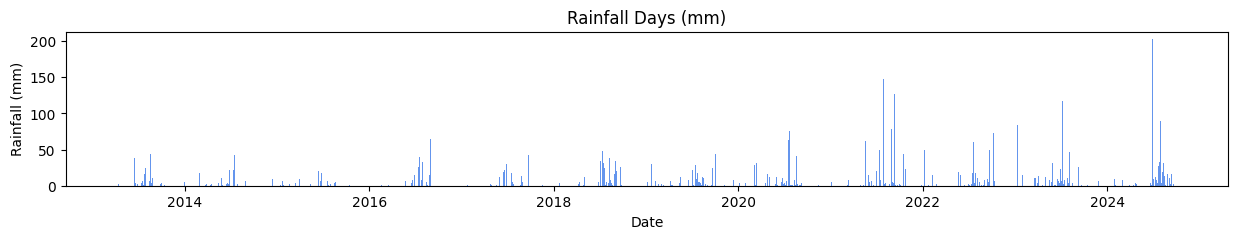

In [ ]:
rainy = df[df['precip'] > 0]
plt.figure(figsize=(15,2))
plt.bar(rainy['DATE'], rainy['precip'], color='cornflowerblue', width=2)
plt.title('Rainfall Days (mm)')
plt.xlabel('Date'); plt.ylabel('Rainfall (mm)')
plt.show()


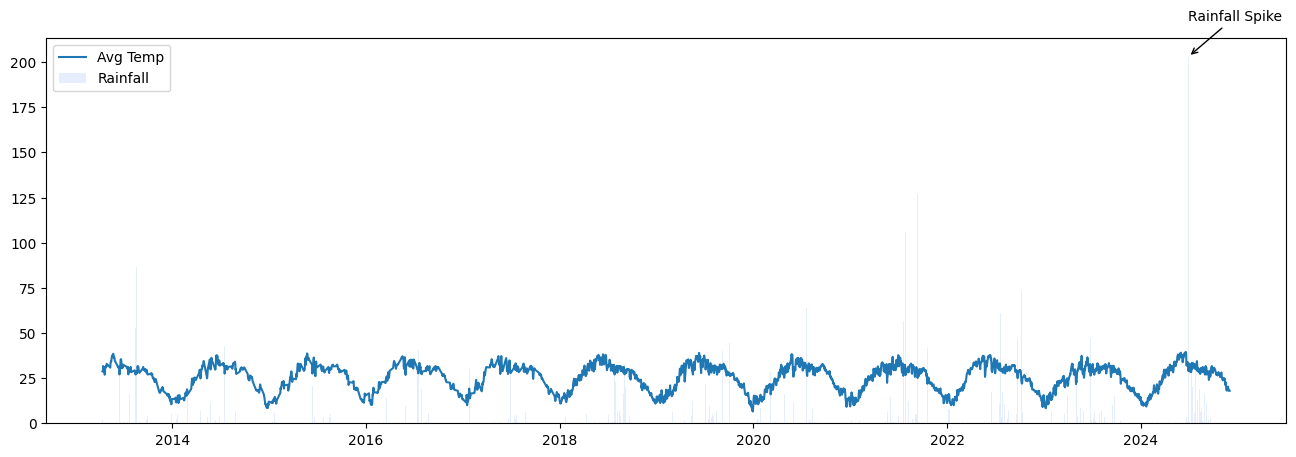

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(df['DATE'], df['temp'], label="Avg Temp")
plt.bar(df['DATE'], df['precip'], width=1, color='cornflowerblue', alpha=0.16, label="Rainfall")
# Add annotation for spike:
max_rain = df['precip'].idxmax()
plt.annotate('Rainfall Spike', xy=(df['DATE'][max_rain], df['precip'][max_rain]),
             xytext=(df['DATE'][max_rain], df['precip'][max_rain] + 20),
             arrowprops=dict(facecolor='blue', arrowstyle="->"), fontsize=10)
plt.legend(); plt.show()


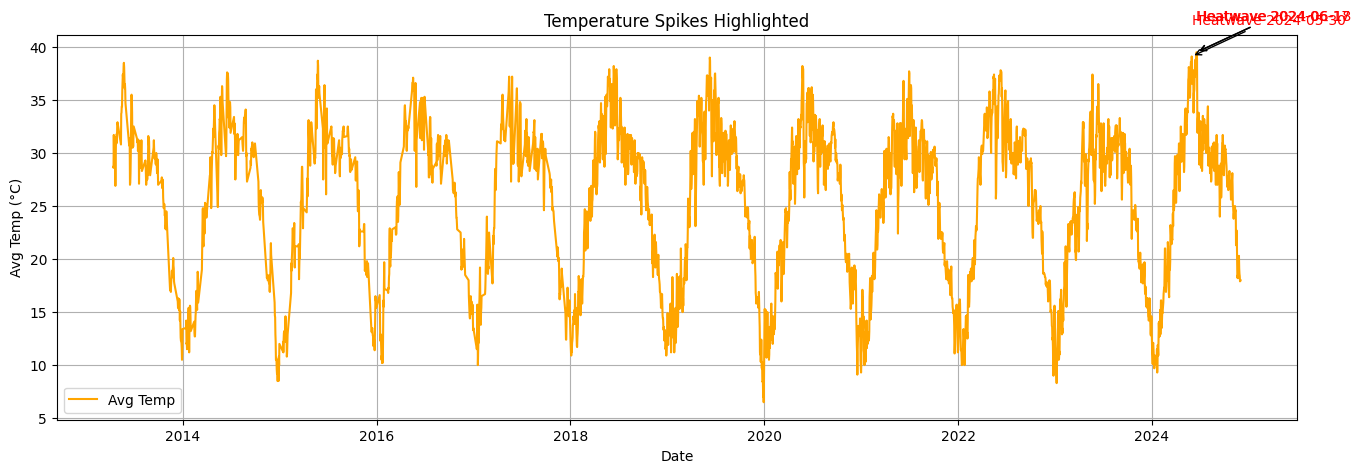

In [ ]:
# Find top-3 max temperature spikes
top_temps = df.nlargest(3, 'temp')
plt.figure(figsize=(16,5))
plt.plot(df['DATE'], df['temp'], label="Avg Temp", color='orange')
for i, row in top_temps.iterrows():
    plt.annotate(f'Heatwave {row["DATE"].date()}',
                 xy=(row['DATE'], row['temp']),
                 xytext=(row['DATE'], row['temp']+3),
                 arrowprops=dict(facecolor='red', arrowstyle="->"),
                 fontsize=10, color='red')
plt.xlabel("Date")
plt.ylabel("Avg Temp (°C)")
plt.title("Temperature Spikes Highlighted")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import plotly.express as px
fig = px.line(df, x='DATE', y='temp', title="Interactive Daily Temperature Trend")
fig.add_scatter(x=df['DATE'], y=df['precip'], mode='lines', name='Rainfall', line=dict(color='blue'))
fig.show()


In [ ]:
# Summarize climate insights
avg_rain = df['precip'].mean()
hottest_day = df.loc[df['temp'].idxmax()]
wettest_day = df.loc[df['precip'].idxmax()]
print("Summary of Insights:")
print(f"- Average rainfall over period: {avg_rain:.2f} mm/day")
print(f"- Hottest day: {hottest_day['DATE'].date()} ({hottest_day['temp']}°C)")
print(f"- Wettest day: {wettest_day['DATE'].date()} ({wettest_day['precip']} mm)")
print("- Monthly temperature and rainfall patterns are visualized above.")


Summary of Insights:
- Average rainfall over period: 2.46 mm/day
- Hottest day: 2024-06-17 (39.5°C)
- Wettest day: 2024-06-28 (203.047 mm)
- Monthly temperature and rainfall patterns are visualized above.


In [ ]:
import plotly.graph_objects as go

summary_fig = go.Figure()

# Hottest Day
summary_fig.add_trace(go.Indicator(
    mode="number+delta",
    value=hottest_day['temp'],
    number={'suffix':"°C"},
    title={"text": f"Hottest Day<br>{hottest_day['DATE'].date()}"},
    delta={'reference': df['temp'].mean(), 'increasing': {'color': "red"}},
    domain={'row': 0, 'column': 0}
))

# Wettest Day
summary_fig.add_trace(go.Indicator(
    mode="number+delta",
    value=wettest_day['precip'],
    number={'suffix':" mm"},
    title={"text": f"Wettest Day<br>{wettest_day['DATE'].date()}"},
    delta={'reference': df['precip'].mean(), 'increasing': {'color': "blue"}},
    domain={'row': 0, 'column': 1}
))

# Average Rainfall
summary_fig.add_trace(go.Indicator(
    mode="number",
    value=avg_rain,
    number={'suffix':" mm/day"},
    title={"text": "Average Daily Rainfall"},
    domain={'row': 0, 'column': 2}
))

summary_fig.update_layout(
    grid={'rows': 1, 'columns': 3, 'pattern': "independent"},
    title="Climate Insights Summary"
)

summary_fig.show()


In [ ]:
!pip install ipywidgets
from google.colab import output
output.enable_custom_widget_manager()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.4 MB/s eta 0:00:00


In [ ]:
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Dropdown for month selection
month_selector = widgets.Dropdown(
    options=sorted(df['DATE'].dt.month.unique()),
    value=df['DATE'].dt.month.min(),
    description='Month:'
)

# Plot function
def plot_monthly_trends(selected_month):
    month_data = df[df['DATE'].dt.month == selected_month]
    fig = px.line(month_data, x='DATE', y='temp', title=f"Temperature Trend - Month {selected_month}")
    fig.add_bar(x=month_data['DATE'], y=month_data['precip'], name='Rainfall', opacity=0.3)
    fig.update_layout(barmode='overlay')
    fig.show()  # Use .show() in Colab for best experience

# Interactive widget link
widgets.interact(plot_monthly_trends, selected_month=month_selector)


interactive(children=(Dropdown(description='Month:', options=(np.int32(1), np.int32(2), np.int32(3), np.int32(…

<function __main__.plot_monthly_trends(selected_month)>

In [ ]:
import pandas as pd

# Assume your cleaned data is in a DataFrame called 'df'
df.to_csv('cleaned_data.csv', index=False)
